Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not



In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data',index_col=0)

In [4]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
df.shape

(3999, 11)

In [7]:
# Renaming the column
df=df.rename({'Award?':'Award'},axis=1)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
#Check for Null Values
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [9]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
# Normalized data frame (considering the numerical part of data)
scaled = norm_func(df.iloc[:,0:10])

In [11]:
scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
ID#,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797


# Hierarchical Clustering

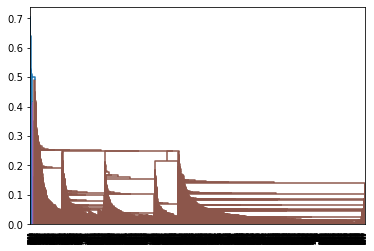

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled, method='single'))

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [14]:
# save clusters for chart
y_hc = hc.fit_predict(scaled)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [15]:
df['clusterid_hc']=Clusters

In [16]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_hc
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
4,14776,0,1,1,1,500,1,0,0,6952,0,0.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN


In [17]:
df.groupby(['clusterid_hc']).agg(['mean']).reset_index()

,clusterid_hc,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0.0,73905.832411,145.021137,2.063161,1.014595,1.01233,17200.00151,11.623301,462.351787,1.380221,4135.668093,0.370911
1,1.0,7388.000000,0.000000,1.000000,1.000000,1.00000,3958.00000,15.000000,150.000000,1.000000,446.000000,0.000000
2,2.0,47056.000000,0.000000,1.000000,1.000000,1.00000,0.00000,0.000000,0.000000,0.000000,2031.000000,0.000000


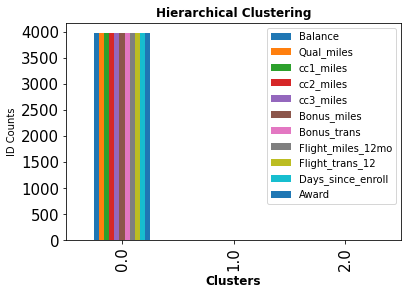

In [25]:
# Plotting barplot using groupby method to get visualization of how many row no. in each clu
df.groupby(['clusterid_hc']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# K-Means

In [19]:
df1=df.drop(['clusterid_hc'],axis=1)
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


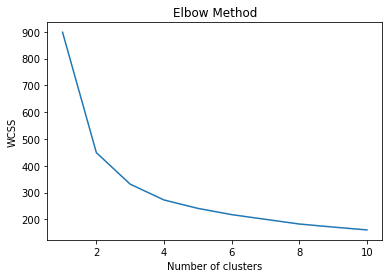

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled)

KMeans(n_clusters=4, random_state=42)

In [22]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 0, 0])

In [23]:
df1['clusterid_k']=clusters_new.labels_
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_k
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [24]:
df1.groupby(['clusterid_k']).agg(['mean']).reset_index()

,clusterid_k,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,40342.787189,121.339502,1.095374,1.020641,1.004982,4453.488256,7.162278,394.088968,1.156584,2198.788612,0.220641
1,1,65943.404966,171.380993,1.128425,1.023116,1.005993,5185.728596,8.013699,488.767979,1.497432,5753.320205,0.310788
2,2,137264.839357,164.595716,4.016064,1.001339,1.034806,46974.539491,19.696118,596.432396,1.784471,6173.950469,0.629183
3,3,85554.287187,121.805596,3.503682,1.001473,1.013255,31160.790869,18.055965,397.131075,1.157585,3017.675994,0.497791


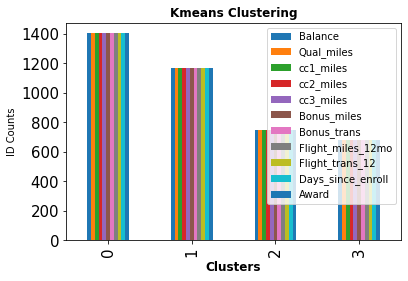

In [26]:
# Plotting barplot using groupby method to get visualization of how many row no. in each clu
df1.groupby(['clusterid_k']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [27]:
df1[df1['clusterid_k']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_k
ID#,,,,,,,,,,,,
1141,1625,0,1,1,1,1375,4,0,0,1547,0,0
1445,44665,0,1,1,1,333,2,333,2,3601,0,0
1564,65021,0,2,1,1,10369,12,0,0,3547,0,0
1566,18433,0,1,1,1,3174,9,0,0,3930,0,0
1567,6341,0,1,1,1,3658,12,0,0,3706,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4016,3974,0,1,1,1,365,3,0,0,1397,0,0
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [28]:
df1[df1['clusterid_k']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_k
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2201,109268,0,2,1,1,7401,17,750,1,4034,0,1
2207,61617,0,2,1,1,23495,13,0,0,3972,0,1
2217,12271,500,2,1,1,7684,15,1000,2,4219,0,1


In [29]:
df1[df1['clusterid_k']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_k
ID#,,,,,,,,,,,,
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
7,84914,0,3,1,1,27482,25,0,0,6994,0,2
9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
12,96522,0,5,1,1,61105,19,0,0,6924,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2352,76118,0,5,1,1,79154,41,1992,2,3621,1,2
2380,146232,0,5,1,1,83783,19,375,1,3566,1,2
2382,108081,0,5,1,5,217006,24,0,0,3567,1,2


In [30]:
df1[df1['clusterid_k']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_k
ID#,,,,,,,,,,,,
994,106115,0,3,1,1,16197,21,500,1,5219,0,3
1080,37163,0,3,1,1,19318,14,0,0,4988,0,3
1177,22372,0,3,1,1,14766,12,0,0,4950,0,3
1236,110247,0,3,1,1,13690,16,0,0,5272,0,3
1254,50016,0,3,1,1,13495,14,0,0,4548,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4002,57793,0,3,1,1,20959,15,1198,3,1424,1,3
4003,28867,0,3,1,1,19169,28,0,0,1425,0,3
4008,59017,0,4,1,1,34746,25,0,0,1418,0,3


# DBSCAN

In [31]:
df2=df1.drop(['clusterid_k'],axis=1)
df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [89]:
dbscan = DBSCAN(eps=0.20, min_samples=22)
dbscan.fit(scaled)

DBSCAN(eps=0.2, min_samples=22)

In [90]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [91]:
#Assign clusters to the data set
df2['clusterid_DBSCAN'] = dbscan.labels_
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_DBSCAN
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2


In [92]:
df2.groupby(['clusterid_DBSCAN']).agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,206649.432314,1540.100437,2.637555,1.253275,1.213974,47294.244541,25.480349,2921.240175,8.567686,4709.310044,0.689956
1,0,45029.299267,66.536205,1.000000,1.000000,1.000000,3311.613199,6.060037,339.895967,1.016040,3731.315307,0.230522
2,1,104083.518443,56.973361,4.000000,1.000000,1.000000,39377.303279,18.606557,342.395492,1.051230,4726.526639,0.577869
3,2,79343.827993,41.227656,3.000000,1.000000,1.000000,19681.384486,16.227656,231.244519,0.657673,4299.232715,0.456998
4,3,62602.117647,53.709559,2.000000,1.000000,1.000000,10678.761029,14.308824,143.904412,0.466912,4247.886029,0.356618
5,4,144185.680851,49.314894,5.000000,1.000000,1.000000,71123.872340,20.182979,365.051064,1.208511,5270.391489,0.723404


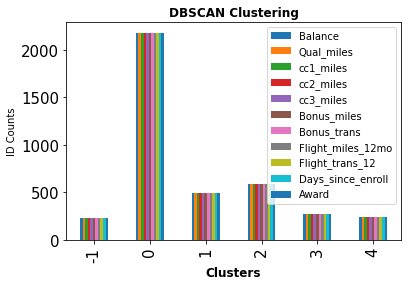

In [93]:
# Plotting barplot using groupby method to get visualization of how many row no. in each clu
df2.groupby(['clusterid_DBSCAN']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [94]:
df2[df2['clusterid_DBSCAN']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_DBSCAN
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4016,3974,0,1,1,1,365,3,0,0,1397,0,0
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [95]:
df2[df2['clusterid_DBSCAN']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_DBSCAN
ID#,,,,,,,,,,,,
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
16,28495,0,4,1,1,49442,15,0,0,6912,1,1
17,51890,0,4,1,1,48963,16,0,0,6910,1,1
33,276571,0,4,1,1,42044,23,0,0,7872,0,1
36,123759,0,4,1,1,50572,23,2500,5,7865,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3922,90666,0,4,1,1,32474,14,0,0,1582,0,1
3931,57642,0,4,1,1,52176,15,0,0,1564,1,1
3953,40424,0,4,1,1,44110,26,343,3,1523,1,1


In [96]:
df2[df2['clusterid_DBSCAN']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_DBSCAN
ID#,,,,,,,,,,,,
7,84914,0,3,1,1,27482,25,0,0,6994,0,2
10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
19,91473,0,3,1,1,27408,17,0,0,6903,1,2
20,23354,0,3,1,1,10447,5,0,0,6896,1,2
29,59763,0,3,1,1,33772,20,100,1,7907,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3997,58387,0,3,1,1,14581,39,0,0,1435,0,2
4002,57793,0,3,1,1,20959,15,1198,3,1424,1,2
4003,28867,0,3,1,1,19169,28,0,0,1425,0,2


In [97]:
df2[df2['clusterid_DBSCAN']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_DBSCAN
ID#,,,,,,,,,,,,
11,40091,0,2,1,1,7278,10,0,0,6959,0,3
13,43382,0,2,1,1,11150,20,0,0,6924,0,3
47,92336,0,2,1,1,11214,6,0,0,6884,0,3
91,62553,0,2,1,1,7672,16,700,1,6819,0,3
119,143967,0,2,1,1,7346,11,0,0,7689,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3962,40346,0,2,1,1,5412,13,0,0,1483,0,3
3970,45533,0,2,1,1,12247,20,0,0,1486,0,3
3990,26504,0,2,1,1,10599,29,1000,7,1445,0,3


In [98]:
df2[df2['clusterid_DBSCAN']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_DBSCAN
ID#,,,,,,,,,,,,
12,96522,0,5,1,1,61105,19,0,0,6924,1,4
21,120576,0,5,1,1,58831,23,250,2,6896,1,4
82,38896,0,5,1,1,76988,16,556,1,7771,1,4
88,35418,0,5,1,1,58557,18,900,3,6813,1,4
103,25076,1182,5,1,1,57203,14,0,0,6750,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3520,151265,0,5,1,1,61068,13,0,0,1213,0,4
3524,177785,0,5,1,1,77203,15,0,0,1251,1,4
3776,70178,0,5,1,1,61530,12,1300,6,3306,1,4
